In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("prepared_dataset.csv").set_index("DATE")

In [3]:
df.head()

,CSUSHPISA,Year,Month,Per_Capita_GDP,UNRATE,Cons_Materials,FEDFUNDS
DATE,,,,,,,
2001-07-01,113.491,2001.0,7.0,46390.000000,4.6,143.4,3.77
2001-08-01,114.167,2001.0,8.0,46393.333333,4.9,143.3,3.65
2001-09-01,114.811,2001.0,9.0,46396.666667,5.0,143.0,3.07
2001-10-01,115.309,2001.0,10.0,46400.000000,5.3,142.3,2.49
2001-11-01,115.857,2001.0,11.0,46494.333333,5.5,142.1,2.09


In [4]:
df.drop(columns = ["Year", "Month"], inplace = True)

correlation

In [5]:
df.corr()

,CSUSHPISA,Per_Capita_GDP,UNRATE,Cons_Materials,FEDFUNDS
CSUSHPISA,1.000000,0.914609,-0.477485,0.918051,0.192987
Per_Capita_GDP,0.914609,1.000000,-0.433192,0.929945,-0.011811
UNRATE,-0.477485,-0.433192,1.000000,-0.276253,-0.540521
Cons_Materials,0.918051,0.929945,-0.276253,1.000000,-0.099633
FEDFUNDS,0.192987,-0.011811,-0.540521,-0.099633,1.000000


In [6]:
y = df.pop("CSUSHPISA")
X = df

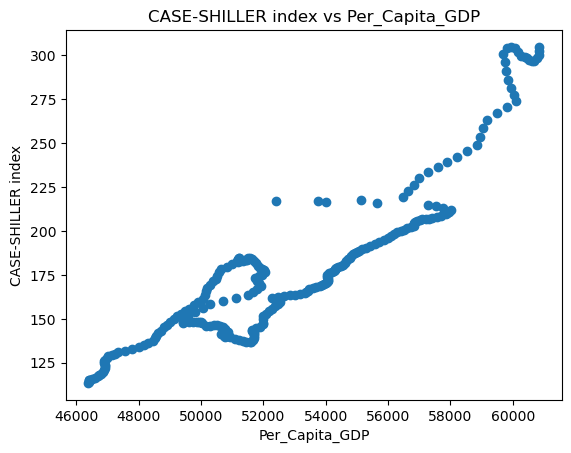

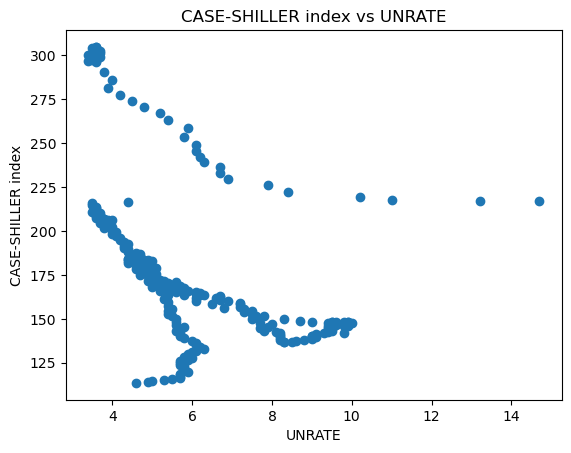

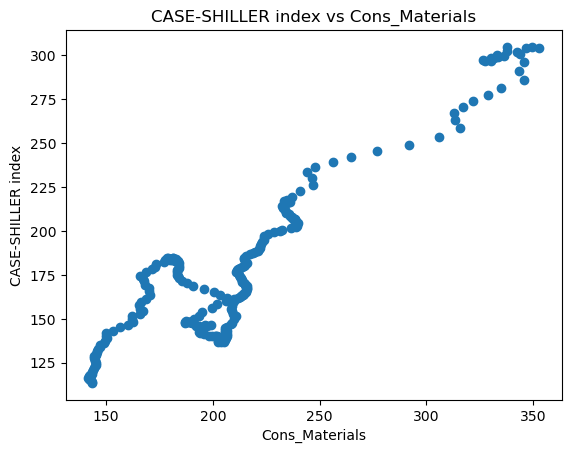

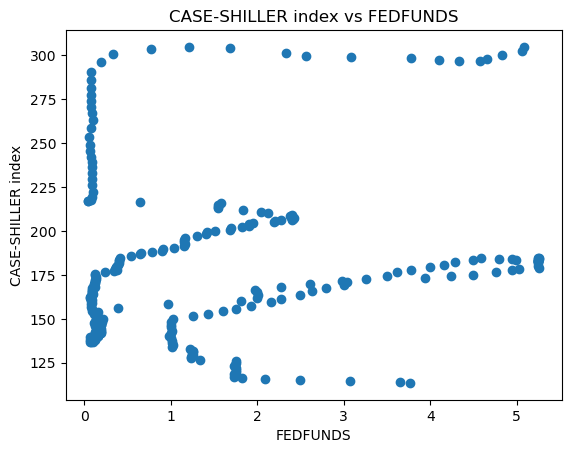

In [7]:
for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

mult_cols = ["Working_Population", "CPI", "Urban_pop", "Num_Households", 
             "Subsidy", "old_percent", "Cons_Materials", "Income"]
df.drop(columns = mult_cols, inplace = True)
X = df

mult_cols = ["Working_Population", "CPI", "Urban_pop", "Num_Households", 
             "Subsidy", "old_percent", "Cons_Materials", "Income"]
df.drop(columns = mult_cols, inplace = True)
X = df

In [12]:
scalar = MinMaxScaler()
X = scalar.fit_transform(X)

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_valid)
score = r2_score(pred, y_valid)
print("The r2_score for the validation set is: ", score)

The r2_score for the validation set is:  0.928898222282997


In [15]:
#Printing the regression coefficients of different variables
coefs = model.coef_
cols = df.columns
for i in range(len(coefs)):
    print(f"The coefficient for {cols[i]} is {coefs[i]}")

The coefficient for Per_Capita_GDP is 52.897791469381815
The coefficient for UNRATE is -4.750556393022027
The coefficient for Cons_Materials is 128.49197214908546
The coefficient for FEDFUNDS is 37.764108440315695


In [16]:
# The intercept
print("The intercept is: ", model.intercept_)

The intercept is:  104.3359509108178
